In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import pandas as pd
import numpy as np
from PyHa.statistics import *
from PyHa.IsoAutio import *
from PyHa.visualizations import *

# Microfaune + PyHa Experiments

In [3]:
#path_to_audio_files = "/home/jacob/acoustic-species-id/Mixed_Bird/"
#path_to_ground_truth = "MDD_Xeno_Canto_DSC180_Labels_uniform_3s_binary.csv"
path_to_audio_files = "./TEST/"
path_to_ground_truth = "./ScreamingPiha_Manual_Labels copy.csv"

# Parameters to define isolation behavior
isolation_parameters_micro = {
    "model" : "microfaune",
    "technique" : "chunk",
    "threshold_type" : "median",
    "threshold_const" : 4.0,
    "threshold_min" : 0.25,
    "window_size" : 2.0,
    "chunk_size" : 3.0
}

In [4]:
automated_df_micro, local_scores_micro = generate_automated_labels(path_to_audio_files,isolation_parameters_micro, include_local_scores=True);

1/1 [==============================] - 2s 2s/step


In [5]:
#automated_df_micro.to_csv("MDD_Xeno_Canto_Microfaune_Chunk_median_025_400.csv",index=False)
automated_df_micro.to_csv("Piha_Microfaune_Chunk_median_025_400.csv",index=False)

In [6]:
manual_df = pd.read_csv(path_to_ground_truth)
# Removing the segments that are not 3s long (the ones at the end of clips)
automated_df_micro = automated_df_micro[automated_df_micro["DURATION"]==3.0]
manual_df

,FOLDER,IN FILE,CLIP LENGTH,CHANNEL,OFFSET,DURATION,SAMPLE RATE,MANUAL ID
0,./TEST/,ScreamingPiha1.wav,32.6160,0,1.5448,2.1297,16000,bird
1,./TEST/,ScreamingPiha1.wav,32.6160,0,10.1638,0.8498,16000,bird
2,./TEST/,ScreamingPiha1.wav,32.6160,0,0.5549,0.9999,16000,bird
3,./TEST/,ScreamingPiha1.wav,32.6160,0,8.7739,0.8399,16000,bird
4,./TEST/,ScreamingPiha1.wav,32.6160,0,12.6335,1.9997,16000,bird
...,...,...,...,...,...,...,...,...
249,./TEST/,ScreamingPiha2.wav,33.9331,0,26.9274,1.7602,44100,bird
250,./TEST/,ScreamingPiha2.wav,33.9331,0,30.8178,0.7200,44100,bird
251,./TEST/,ScreamingPiha2.wav,33.9331,0,29.8677,0.9401,44100,bird
252,./TEST/,ScreamingPiha2.wav,33.9331,0,31.5378,1.9502,44100,bird


In [7]:
statistics_df_micro = automated_labeling_statistics(automated_df_micro,manual_df,stats_type = "general");
#statistics_df.to_csv("MDD_Xeno_Canto_DSC180_Stats_9.csv",index=False)

In [8]:
global_dataset_statistics(statistics_df_micro)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.470542,0.322436,0.382658,0.236597


# BirdNET-Lite Experiments

In [9]:
# loading in the manual annotations again in case someone wants to play with BirdNET without playing with Microfaune
#path_to_ground_truth = "MDD_Xeno_Canto_DSC180_Labels_uniform_3s_binary.csv"
#path_to_ground_truth = "ScreamingPiha_Manual_Labels.csv"
manual_df = pd.read_csv(path_to_ground_truth)

isolation_parameters_birdnet = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : True
}


#birdnet_labels = pd.read_csv("birdnet_experiments/experiment1.csv")

In [10]:
automated_df_birdnet, local_scores_birdnet = generate_automated_labels(path_to_audio_files,isolation_parameters_birdnet, include_local_scores=True);

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.6 SECONDS
DONE! WROTE 30 RESULTS.
READING AUDIO DATA... DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.1 SECONDS
DONE! WROTE 21 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.5 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.3 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.3 SECONDS
DONE! WROTE 24 RESULTS.
READING AUDIO DATA... DONE! READ 45 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.4 SECONDS
DONE! W

In [11]:
#automated_df_micro.to_csv("MDD_Xeno_Canto_Microfaune_Chunk_median_025_400.csv",index=False)
birdnet_labels = automated_df_birdnet
automated_df_birdnet.to_csv("Piha_BirdNET_Chunk.csv",index=False)

In [12]:
statistics_df_birdnet = automated_labeling_statistics(birdnet_labels,manual_df,stats_type = "general");

In [13]:
statistics_df_birdnet

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,.\TEST\,ScreamingPiha1.wav,bird,14.288229,18.327771,0.000000,0.000000,32.616000,0.438074,1.000000,0.609251,0.438074
1,.\TEST\,ScreamingPiha10.wav,bird,39.381250,50.401625,0.000000,0.000000,89.782875,0.438628,1.000000,0.609786,0.438628
2,.\TEST\,ScreamingPiha11.wav,bird,37.656771,25.343229,0.160604,0.734917,63.160604,0.597727,0.995753,0.747029,0.596207
3,.\TEST\,ScreamingPiha2.wav,bird,17.893687,15.106312,0.598000,0.335062,33.598000,0.542233,0.967661,0.695013,0.532582
4,.\TEST\,ScreamingPiha3.wav,bird,4.455708,1.544292,0.000000,0.844083,6.000000,0.742618,1.000000,0.852302,0.742618
5,.\TEST\,ScreamingPiha4.wav,bird,5.401604,8.155958,0.000000,0.000000,13.557562,0.398420,1.000000,0.569815,0.398420
6,.\TEST\,ScreamingPiha5.wav,bird,35.298563,18.701438,0.000000,0.177979,54.000000,0.653677,1.000000,0.790574,0.653677
7,.\TEST\,ScreamingPiha6.wav,bird,24.858313,45.776792,0.000000,0.000000,70.635104,0.351926,1.000000,0.520629,0.351926
8,.\TEST\,ScreamingPiha7.wav,bird,51.630104,81.960083,0.000000,0.000000,133.590188,0.386481,1.000000,0.557499,0.386481
9,.\TEST\,ScreamingPiha8.wav,bird,6.900104,37.220729,0.000000,0.000000,44.120833,0.156391,1.000000,0.270481,0.156391


In [14]:
global_dataset_statistics(statistics_df_birdnet)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.460433,0.993387,0.629223,0.459026


In [15]:
isolation_parameters_birdnet_conf = {
   "model" : "birdnet",
   "output_path" : "outputs",
   "filetype" : "wav", 
   "num_predictions" : 1,
   "write_to_csv" : True
}
automated_df_birdnet_conf = generate_automated_labels(path_to_audio_files,isolation_parameters_birdnet_conf);
statistics_df_conf = automated_labeling_statistics(automated_df_birdnet_conf,manual_df,stats_type = "general");

LOADING TF LITE MODEL... DONE!
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 30 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.6 SECONDS
DONE! WROTE 30 RESULTS.
READING AUDIO DATA... DONE! READ 21 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 21 RESULTS.
READING AUDIO DATA... DONE! READ 11 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.6 SECONDS
DONE! WROTE 11 RESULTS.
READING AUDIO DATA... DONE! READ 2 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.1 SECONDS
DONE! WROTE 2 RESULTS.
READING AUDIO DATA... DONE! READ 5 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.2 SECONDS
DONE! WROTE 5 RESULTS.
READING AUDIO DATA... DONE! READ 18 CHUNKS.
ANALYZING AUDIO... DONE! Time 0.9 SECONDS
DONE! WROTE 18 RESULTS.
READING AUDIO DATA... DONE! READ 24 CHUNKS.
ANALYZING AUDIO... DONE! Time 1.2 SECONDS
DONE! WROTE 24 RESULTS.
READING AUDIO DATA... DONE! READ 45 CHUNKS.
ANALYZING AUDIO... DONE! Time 2.4 SECONDS
DONE! W

In [16]:
global_dataset_statistics(statistics_df_conf)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.460433,0.993387,0.629223,0.459026


# Tweetynet Experiments

In [17]:
# loading in the manual annotations again in case someone wants to play with TweetyNET without playing with Microfaune
#path_to_ground_truth = "MDD_Xeno_Canto_DSC180_Labels_uniform_3s_binary.csv"
#path_to_ground_truth = "ScreamingPiha_Manual_Labels.csv"
manual_df = pd.read_csv(path_to_ground_truth)

isolation_parameters_tweety = {
   "model" : "tweetynet",
    "tweety_output" : True,
    "chunk_size" : 3.0
}

In [18]:
automated_df_tweety, local_scores_tweety = generate_automated_labels(path_to_audio_files,isolation_parameters_tweety, include_local_scores=True);

In [19]:
#automated_df_micro.to_csv("MDD_Xeno_Canto_Microfaune_Chunk_median_025_400.csv",index=False)
automated_df_tweety.to_csv("Piha_TweetyNET_Chunk.csv",index=False)

In [20]:
statistics_df_tweety = automated_labeling_statistics(birdnet_labels,manual_df,stats_type = "general");

In [21]:
statistics_df_tweety

,FOLDER,IN FILE,MANUAL ID,TRUE POSITIVE,FALSE POSITIVE,FALSE NEGATIVE,TRUE NEGATIVE,UNION,PRECISION,RECALL,F1,Global IoU
0,.\TEST\,ScreamingPiha1.wav,bird,14.288229,18.327771,0.000000,0.000000,32.616000,0.438074,1.000000,0.609251,0.438074
1,.\TEST\,ScreamingPiha10.wav,bird,39.381250,50.401625,0.000000,0.000000,89.782875,0.438628,1.000000,0.609786,0.438628
2,.\TEST\,ScreamingPiha11.wav,bird,37.656771,25.343229,0.160604,0.734917,63.160604,0.597727,0.995753,0.747029,0.596207
3,.\TEST\,ScreamingPiha2.wav,bird,17.893687,15.106312,0.598000,0.335062,33.598000,0.542233,0.967661,0.695013,0.532582
4,.\TEST\,ScreamingPiha3.wav,bird,4.455708,1.544292,0.000000,0.844083,6.000000,0.742618,1.000000,0.852302,0.742618
5,.\TEST\,ScreamingPiha4.wav,bird,5.401604,8.155958,0.000000,0.000000,13.557562,0.398420,1.000000,0.569815,0.398420
6,.\TEST\,ScreamingPiha5.wav,bird,35.298563,18.701438,0.000000,0.177979,54.000000,0.653677,1.000000,0.790574,0.653677
7,.\TEST\,ScreamingPiha6.wav,bird,24.858313,45.776792,0.000000,0.000000,70.635104,0.351926,1.000000,0.520629,0.351926
8,.\TEST\,ScreamingPiha7.wav,bird,51.630104,81.960083,0.000000,0.000000,133.590188,0.386481,1.000000,0.557499,0.386481
9,.\TEST\,ScreamingPiha8.wav,bird,6.900104,37.220729,0.000000,0.000000,44.120833,0.156391,1.000000,0.270481,0.156391


In [22]:
global_dataset_statistics(statistics_df_tweety)

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.460433,0.993387,0.629223,0.459026


# Model Comparison

In [23]:
manual_df.style.set_caption("Manual Annotations");
automated_df_micro.style.set_caption("Microfaune Annotations");
automated_df_birdnet.style.set_caption("BirdNET Annotations");
automated_df_tweety.style.set_caption("TweetyNET Annotations");

In [24]:
display(global_dataset_statistics(statistics_df_micro).style.set_caption("Microfaune Annotations"))
display(global_dataset_statistics(statistics_df_birdnet).style.set_caption("BirdNET Annotations"))
display(global_dataset_statistics(statistics_df_tweety).style.set_caption("TweetyNET Annotations"))

,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.470542,0.322436,0.382658,0.236597


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.460433,0.993387,0.629223,0.459026


,MANUAL ID,PRECISION,RECALL,F1,Global IoU
0,bird,0.460433,0.993387,0.629223,0.459026


In [25]:
display(annotation_duration_statistics(manual_df).style.set_caption("Manual Annotations"))
display(annotation_duration_statistics(automated_df_micro).style.set_caption("Microfaune Annotations"))
display(annotation_duration_statistics(automated_df_birdnet).style.set_caption("BirdNET Annotations"))
display(annotation_duration_statistics(automated_df_tweety).style.set_caption("TweetyNET Annotations"))

,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,254,1.870000,1.068224,0.664488,0.110000,0.532475,0.780050,1.767475,3.119900


,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,51,3.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,194,3.000000,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


,COUNT,MODE,MEAN,STANDARD DEVIATION,MIN,Q1,MEDIAN,Q3,MAX
0,231,0.050000,1.165006,6.167060,0.046512,0.116279,0.325581,0.906977,88.000000


C:\Users\seanh\Desktop\e4e\PyHa\PyHa\annotation_post_processing.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kaleidoscope_df["FILEPATH"] =  kaleidoscope_df["FOLDER"] + kaleidoscope_df["IN FILE"]


ScreamingPiha1.wav
ScreamingPiha11.wav
ScreamingPiha2.wav
ScreamingPiha4.wav
ScreamingPiha5.wav
ScreamingPiha6.wav
ScreamingPiha7.wav
ScreamingPiha8.wav
ScreamingPiha9.wav
target 157
confidence 157
ScreamingPiha1.wav
ScreamingPiha10.wav
ScreamingPiha11.wav
ScreamingPiha2.wav
ScreamingPiha3.wav
ScreamingPiha4.wav
ScreamingPiha5.wav
ScreamingPiha6.wav
ScreamingPiha7.wav
ScreamingPiha8.wav
ScreamingPiha9.wav
target 188
confidence 188
ScreamingPiha1.wav
ScreamingPiha10.wav
ScreamingPiha11.wav
ScreamingPiha2.wav
ScreamingPiha3.wav
ScreamingPiha4.wav
ScreamingPiha5.wav
ScreamingPiha6.wav
ScreamingPiha7.wav
ScreamingPiha8.wav
ScreamingPiha9.wav
target 188
confidence 188


0.7379631286916054

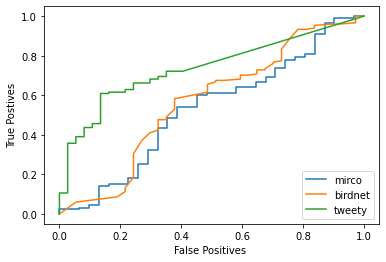

In [27]:
generate_ROC_curves(automated_df_micro, manual_df, local_scores_micro, chunk_length = 3, label="mirco")
generate_ROC_curves(automated_df_birdnet, manual_df, local_scores_birdnet, chunk_length = 3, label="birdnet")
generate_ROC_curves(automated_df_tweety, manual_df, local_scores_tweety, chunk_length = 3, label="tweety")